<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Two_Way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook demonstrate the computation of One-Way ANOVA. The example is from Montgomery Intro to SQC (7th ed chap 4). Paper strength by hardwood concentration. Ref.
https://www.pythonfordatascience.org/anova-python/ 

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
#note that the path is case sensitive
#use a text editor such as notepad to see the seperator dividing data
#go the 1st read option for local file: see the Read data from local file notebook for an example
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/chap13 two factor paint adhesion.csv', sep=',', na_values=".")

data  

,Primer_type,App_Method,Adhesion
0,1,1,4.0
1,2,1,5.6
2,3,1,3.8
3,1,2,5.4
4,2,2,5.8
5,3,2,5.5
6,1,1,4.5
7,2,1,4.9
8,3,1,3.7
9,1,2,4.9


The F test from one-way ANOVA is used to test
**H0: tau5%=tau10%=tau15%=mtau20%=0 **vs
H1: at least one tau <>0
Since the pvalue is very small, we would reject H0 and conclude that 
there is a difference in paper strenght influenced by hardwood concentration 

In [11]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Primer_type  18 non-null     int64  
 1   App_Method   18 non-null     int64  
 2   Adhesion     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [ ]:
df('Primer')

In [13]:
# To generate anova table using the ols model from statsmodel

model = ols('Adhesion ~ Primer_type + App_Method + Primer_type*App_Method', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Primer_type,0.240833,1.0,0.612968,0.446715
App_Method,4.908889,1.0,12.494092,0.003300
Primer_type:App_Method,0.067500,1.0,0.171801,0.684797
Residual,5.500556,14.0,NaN,NaN


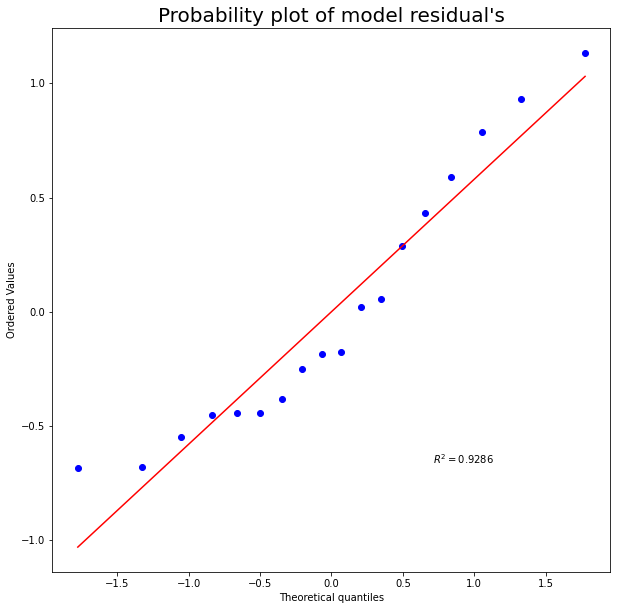

In [14]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [16]:
# Homogeneity of Variance check
# Levene() method

stats.levene(df['Adhesion'][df['Primer_type'] == 1],
             df['Adhesion'][df['Primer_type'] == 2],
             df['Adhesion'][df['Primer_type'] == 3])
            

LeveneResult(statistic=1.7556634304207157, pvalue=0.20649180599000222)

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different hardwood concentration are different

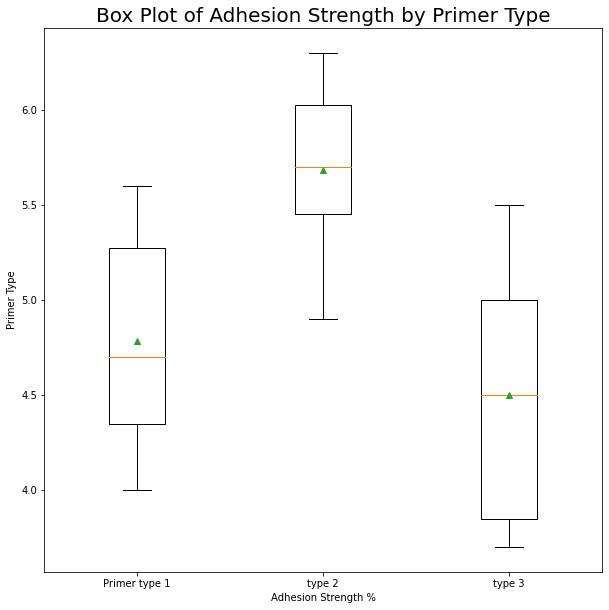

In [21]:
# Box plots by factor Primer_type'

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Adhesion Strength by Primer Type", fontsize= 20)
ax.set

data2 = [df['Adhesion'][df['Primer_type'] == 1],
         df['Adhesion'][df['Primer_type'] == 2],
         df['Adhesion'][df['Primer_type'] == 3]]


ax.boxplot(data2,
           labels= ['Primer type 1', 'type 2', 'type 3'],
           showmeans= True)

plt.xlabel("Adhesion Strength %")
plt.ylabel("Primer Type")

plt.show()

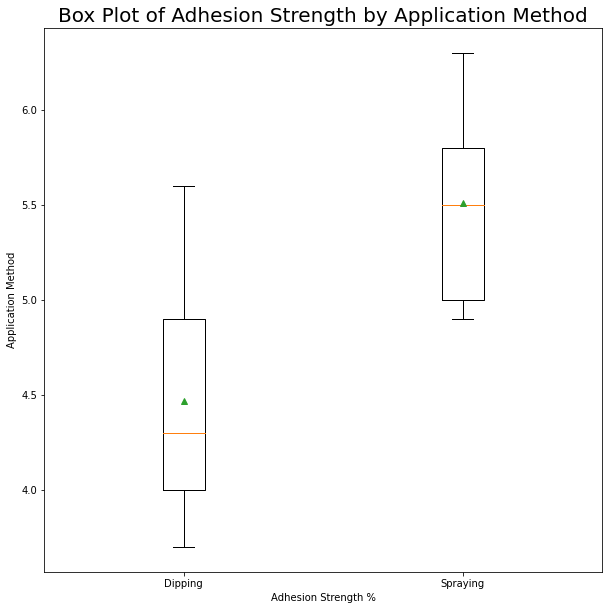

In [20]:
# Box plots by factor Application Method'

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Adhesion Strength by Application Method", fontsize= 20)
ax.set

data2 = [df['Adhesion'][df['App_Method'] == 1],
         df['Adhesion'][df['App_Method'] == 2]]


ax.boxplot(data2,
           labels= ['Dipping', 'Spraying'],
           showmeans= True)

plt.xlabel("Adhesion Strength %")
plt.ylabel("Application Method")

plt.show()